## Projekt - Segmentacja - Adrian Stodolski - DataScience - Tryb zaoczny
### W tym projekcie postaram sie odkryc kto jest najlepszym klientem. Z dostepnych mi informacji postaram sie odpowiedziec na nastepujace pytania:
#### 1. Uzyskać informacje na temat klientów płci męskiej i żeńskiej, a także z tym, jak ich dochody, wiek i wyniki wydatków są podobne lub różne.
#### 2. Sprawdzic ktora plec ma lepszy przychod
#### 3. Zbadac, która płeć ma wyższy średni wynik wydatków.

## Przygotowanie

In [59]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
customers = pd.read_csv('Mall_Customers.csv')

In [61]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [62]:
# Statystyka opisowa
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Wiek wygląda na dość normalnie rozłożony, roczny dochód w tysiącach nie ma zbytnich wartości odstających. Wynik wydatkowania wynosi w rzeczywistości od 1 do 100. Wszystko wygląda dobrze.

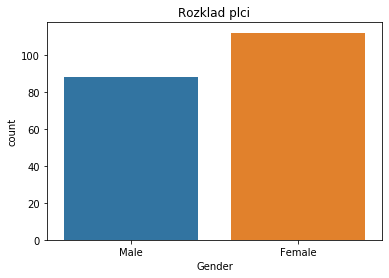

In [63]:
# Rozkład płci w celu rozpoznania różnych rozkładów
sns.countplot(x='Gender', data=customers);
plt.title('Rozklad plci');

W datasecie jest wiecej kobiet niz mezczyzn

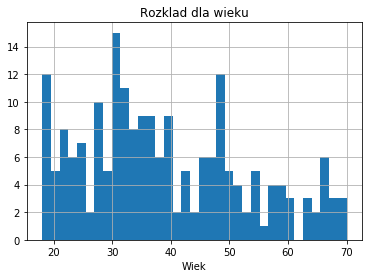

In [64]:
# Histogram dla wieku
customers.hist('Age', bins=35);
plt.title('Rozklad dla wieku');
plt.xlabel('Wiek');

#### Histogram wieku jest nieco prawostronny. Widzieliśmy, że średnia wieku wynosiła również 38 lat, więc nie jest to zaskakujące, ze skokiem w wieku 48-49 i 65 lat.

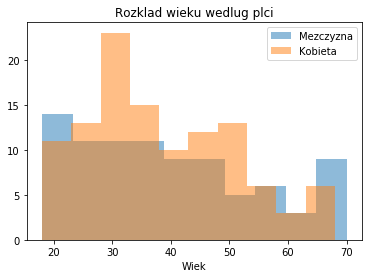

In [65]:
# Histogram wieku wzgledem plci
plt.hist('Age', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Mezczyzna');
plt.hist('Age', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Kobieta');
plt.title('Rozklad wieku wedlug plci');
plt.xlabel('Wiek');
plt.legend();

### Widzimy tu dwie rzeczy

#### 1. Jest wiecej kobiet niz mezczyzn.

#### 2. Jest wiele kobiet mlodszych i kobiet w średnim wieku..

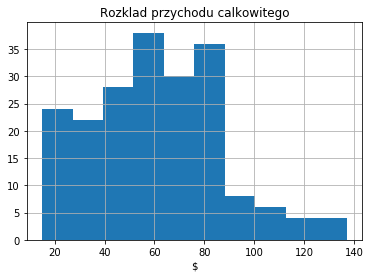

In [66]:
# Histogram przychodu
customers.hist('Annual Income (k$)');
plt.title('Rozklad przychodu calkowitego');
plt.xlabel('$');

#### Najczęstsze roczne dochody wynoszą od około 50 do 85 000..

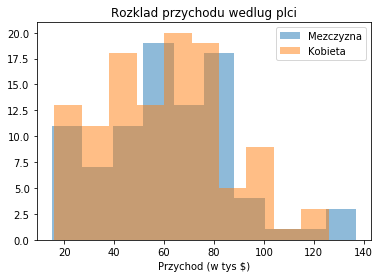

In [67]:
# Histogram przychodu wedlug plci
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Mezczyzna');
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Kobieta');
plt.title('Rozklad przychodu wedlug plci');
plt.xlabel('Przychod (w tys $)');
plt.legend();

#### Kobiety na ogół miały niższe dochody niż mężczyźni, większość z nich mieściła się w przedziale od 45 do 80 000..

In [68]:
# Podzial datasetu wedlug plci
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

In [69]:
# Srednie wydatki dla mezczyzn i kobiet
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


#### Kobiety miały średnio o około 3 punkty wyższy wynik w wydatkach.

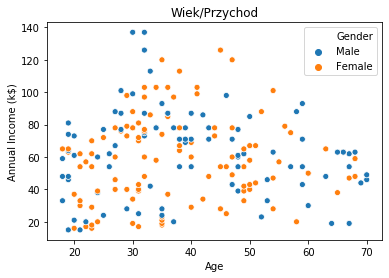

In [70]:
sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=customers);
plt.title('Wiek/Przychod');

#### Z danych wynika ze, nie ma prawie żadnej korelacji między wiekiem a dochodami mężczyzn i kobiet. Potwierdza to poniższa matryca korelacji.

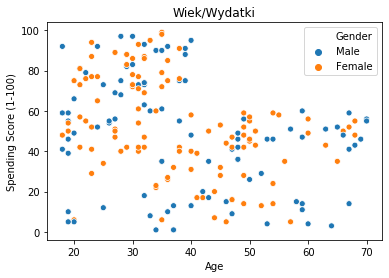

In [71]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Wiek/Wydatki');

#### Powyższy wykres pokazuje ujemną korelację pomiędzy wiekiem a wynikiem finansowym. Nie jest to silne skojarzenie, ale im starsza osoba, tym gorszy wynik finansowy.

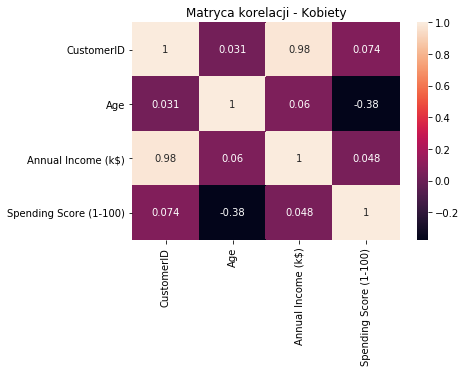

In [72]:
sns.heatmap(female_customers.corr(), annot=True);
plt.title('Matryca korelacji - Kobiety');

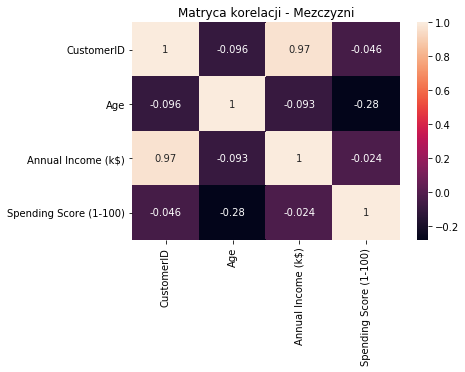

In [73]:
sns.heatmap(male_customers.corr(), annot=True);
plt.title('Matryca korelacji - Mezczyzni');

#### Porównanie mężczyzn z kobietami pokazuje, że istnieje nieco wyższa korelacja między wiekiem a wskaźnikiem wydatków dla kobiet.

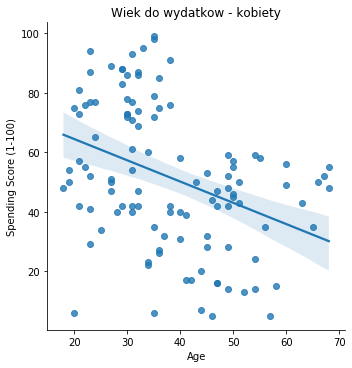

In [74]:
sns.lmplot('Age', 'Spending Score (1-100)', data=female_customers);
plt.title('Wiek do wydatkow - kobiety');

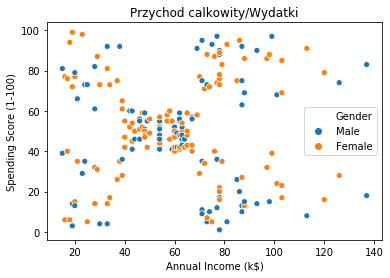

In [75]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Przychod calkowity/Wydatki');

#### Roczna ocena przychodów i wydatków ma nieco powiązane ze sobą środki i odchylenia standardowe, dlatego też widzimy ten dziwny kształt.
  
#### Jest tu 5 nierównych klastrów:
1. Niskie dochody, niski wynik w wydatkach
2. Niskie dochody, wysoki wynik w wydatkach
3. Średni dochód, średni wynik w wydatkach
4. Wysokie dochody, niski wynik w wydatkach
5. Wysokie dochody, wysoki wynik w wydatkach

Co ciekawe, nie ma wysokich dochodów oraz średnich wydatkow.

## Interpretacja

### Na podstawie danych mozna by przetestowac następujace hipotezy:

1. Wprowadzanie na rynek tańszych produktów dla kobiet, aby sprawdzić, czy kupują one częściej lub w większej ilości.

2. Sprzedawać więcej młodszym kobietom, ponieważ ich wyniki w wydatkach są zazwyczaj wyższe.

3. Zastanawianie się nad nowymi sposobami kierowania reklam, cen, brandingu, itp. do starszych kobiet (powyżej 40 roku życia), które mają niższe wyniki w wydatkach.

4. Wymyślenie sposobu na zebranie większej ilości danych w celu zbudowania zestawu danych, który ma więcej cech. Im więcej cech, tym lepsze zrozumienie tego, co determinuje wyniki wydatków. Po lepszym zrozumieniu "Score'u" wydatków, możemy zrozumieć, jakie czynniki doprowadzą do zwiększenia "Score'u" wydatków, a tym samym do większych zysków.